In [247]:
import pandas as pd
from datetime import datetime, timedelta, timezone
import matplotlib as plt
import ast
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns
import plotly.express as px

In [248]:
df = pd.read_csv("Online Retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [249]:
df.dtypes


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [250]:
df.shape

(541909, 8)

In [251]:
df['InvoiceNo'] = df['InvoiceNo'].astype('string')
df['StockCode'] = df['StockCode'].astype('string')
df['Description'] = df['Description'].astype('string')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%d/%m/%Y %H:%M')
df['CustomerID'] = df['CustomerID'].astype('Int64')  
df['Country'] = df['Country'].astype('category')
df.dtypes

InvoiceNo      string[python]
StockCode      string[python]
Description    string[python]
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int64
Country              category
dtype: object

In [252]:
df.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [253]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [254]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [255]:
# drops all rows with missing customerid or invoicedate as they are integral for rfm analysis
df = df.dropna(subset=['InvoiceDate', 'CustomerID'])
df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [256]:
# removes all cancelled orders from the dataset
df = df[df['InvoiceNo'].str[0] != 'C']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [257]:
# removes all O values for unit price
df = df[df['UnitPrice'] != 0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [258]:
# checks for the most recent transaction and sets it as current date for recency analysis
datenow = df['InvoiceDate'].max()
datenow


Timestamp('2011-12-09 12:50:00')

In [259]:
# finds out the latest transaction date of each customer
last_transaction = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
last_transaction = last_transaction.rename(columns={'InvoiceDate':'LastTransaction'})
last_transaction    

,CustomerID,LastTransaction
0,12346,2011-01-18 10:01:00
1,12347,2011-12-07 15:52:00
2,12348,2011-09-25 13:13:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00
...,...,...
4333,18280,2011-03-07 09:52:00
4334,18281,2011-06-12 10:53:00
4335,18282,2011-12-02 11:43:00
4336,18283,2011-12-06 12:02:00


In [260]:
df = df.merge(last_transaction, on='CustomerID', how='left')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,LastTransaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-02 15:27:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-02 15:27:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-02 15:27:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-02 15:27:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-02 15:27:00
...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-09 12:50:00
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12-09 12:50:00
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09 12:50:00
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09 12:50:00


In [261]:
# calculates the difference between the current date and the latest transaction date for each customer, displayed in days
df['days_since_last_trans'] = (datenow - df['LastTransaction']).dt.days
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,LastTransaction,days_since_last_trans
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-02 15:27:00,371
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-02 15:27:00,371
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-02 15:27:00,371
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-02 15:27:00,371
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-02 15:27:00,371
...,...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-09 12:50:00,0
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12-09 12:50:00,0
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09 12:50:00,0
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09 12:50:00,0


In [262]:
# displays the number of days since last transaction for each unique customerid
last_trans = df.loc[:,['CustomerID','days_since_last_trans']]
last_trans = last_trans.groupby('CustomerID')['days_since_last_trans'].max().reset_index()
last_trans

,CustomerID,days_since_last_trans
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309
...,...,...
4333,18280,277
4334,18281,180
4335,18282,7
4336,18283,3


In [263]:
# displays the total transaction count for each unique customerid
freq = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
freq = freq.rename(columns={'InvoiceNo':'TotalCount'})
freq

,CustomerID,TotalCount
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4333,18280,1
4334,18281,1
4335,18282,2
4336,18283,16


In [264]:
# merges both freq and last trans table 
rfm = last_trans.merge(freq, on = 'CustomerID', how='left')
rfm

,CustomerID,days_since_last_trans,TotalCount
0,12346,325,1
1,12347,1,7
2,12348,74,4
3,12349,18,1
4,12350,309,1
...,...,...,...
4333,18280,277,1
4334,18281,180,1
4335,18282,7,2
4336,18283,3,16


In [265]:
df['TotalAmount'] = df['UnitPrice'] * df['Quantity']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,LastTransaction,days_since_last_trans,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-02 15:27:00,371,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-02 15:27:00,371,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-02 15:27:00,371,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-02 15:27:00,371,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-02 15:27:00,371,20.34
...,...,...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-09 12:50:00,0,10.20
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12-09 12:50:00,0,12.60
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09 12:50:00,0,16.60
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09 12:50:00,0,16.60


In [266]:
# displays the average total spendings for each unique customerid
total_spending = df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
total_spending = total_spending.rename(columns={'TotalAmount':'TotalSpendings'})
total_spending

,CustomerID,TotalSpendings
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4333,18280,180.60
4334,18281,80.82
4335,18282,178.05
4336,18283,2094.88


In [267]:
# merging all tables to create rfm df for rfm analysis
rfm_df = rfm.merge(total_spending, on='CustomerID', how='left')
rfm_df


,CustomerID,days_since_last_trans,TotalCount,TotalSpendings
0,12346,325,1,77183.60
1,12347,1,7,4310.00
2,12348,74,4,1797.24
3,12349,18,1,1757.55
4,12350,309,1,334.40
...,...,...,...,...
4333,18280,277,1,180.60
4334,18281,180,1,80.82
4335,18282,7,2,178.05
4336,18283,3,16,2094.88


In [268]:
# calculating r,f,m values
r = pd.qcut(rfm_df['days_since_last_trans'], q=5, labels=range(5,0,-1))
f = pd.qcut(rfm_df['TotalCount'].rank(method='first'),5, labels=[1, 2, 3, 4, 5], duplicates='drop')
m = pd.qcut(rfm_df['TotalSpendings'], q=5, labels=range(1,6))

In [269]:
# assigning rfm values to the dataframe
rfm_df = rfm_df.assign(R=r.values, F=f.values, M=m.values)
rfm_df

,CustomerID,days_since_last_trans,TotalCount,TotalSpendings,R,F,M
0,12346,325,1,77183.60,1,1,5
1,12347,1,7,4310.00,5,5,5
2,12348,74,4,1797.24,2,4,4
3,12349,18,1,1757.55,4,1,4
4,12350,309,1,334.40,1,1,2
...,...,...,...,...,...,...,...
4333,18280,277,1,180.60,1,2,1
4334,18281,180,1,80.82,1,2,1
4335,18282,7,2,178.05,5,3,1
4336,18283,3,16,2094.88,5,5,5


In [270]:
# calculating total rfm value for each customerid
rfm_df['rfm_total'] = rfm_df[['R','F','M']].sum(axis=1)
rfm_df

,CustomerID,days_since_last_trans,TotalCount,TotalSpendings,R,F,M,rfm_total
0,12346,325,1,77183.60,1,1,5,7
1,12347,1,7,4310.00,5,5,5,15
2,12348,74,4,1797.24,2,4,4,10
3,12349,18,1,1757.55,4,1,4,9
4,12350,309,1,334.40,1,1,2,4
...,...,...,...,...,...,...,...,...
4333,18280,277,1,180.60,1,2,1,4
4334,18281,180,1,80.82,1,2,1,4
4335,18282,7,2,178.05,5,3,1,9
4336,18283,3,16,2094.88,5,5,5,15


In [271]:
# creating 10 customer segments from the total rfm values
rfm_df['rfm_score'] = pd.qcut(rfm_df['rfm_total'], 10, labels=range(1,11)) 
rfm_df



,CustomerID,days_since_last_trans,TotalCount,TotalSpendings,R,F,M,rfm_total,rfm_score
0,12346,325,1,77183.60,1,1,5,7,4
1,12347,1,7,4310.00,5,5,5,15,10
2,12348,74,4,1797.24,2,4,4,10,6
3,12349,18,1,1757.55,4,1,4,9,5
4,12350,309,1,334.40,1,1,2,4,1
...,...,...,...,...,...,...,...,...,...
4333,18280,277,1,180.60,1,2,1,4,1
4334,18281,180,1,80.82,1,2,1,4,1
4335,18282,7,2,178.05,5,3,1,9,5
4336,18283,3,16,2094.88,5,5,5,15,10


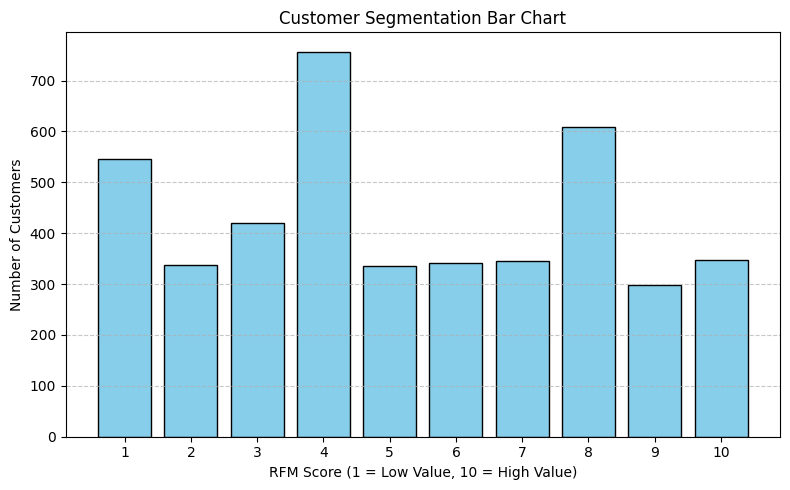

In [272]:
segment_counts = rfm_df['rfm_score'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.bar(segment_counts.index.astype(str), segment_counts.values, color='skyblue', edgecolor='black')
plt.title('Customer Segmentation Bar Chart')
plt.xlabel('RFM Score (1 = Low Value, 10 = High Value)')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

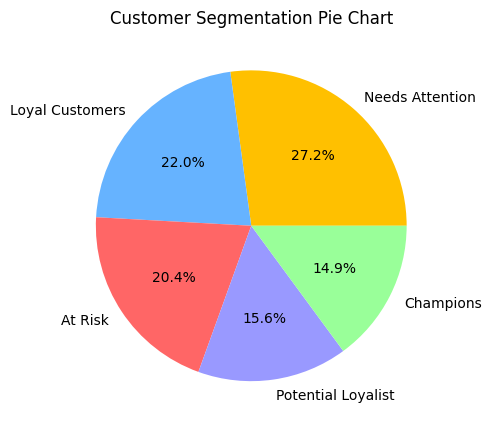

In [273]:
# splitting customers into 5 segments based on their rfm scores

def label_segment(x):
    if x >= 9:
        return 'Champions'
    elif x >= 7:
        return 'Loyal Customers'
    elif x >= 5:
        return 'Potential Loyalist'
    elif x >= 3:
        return 'Needs Attention'
    else:
        return 'At Risk'
    
rfm_df['Segment_Label'] = rfm_df['rfm_score'].apply(label_segment)   
segment_counts = rfm_df['Segment_Label'].value_counts()    
    
    
    
custom_colors = [
    '#ffc000',  # Needs Attention
    '#66b3ff',  # Loyal Customers
    '#ff6666',  # At Risk
    '#9999ff',  # Potential Loyalists
    '#99ff99',  # Champions
]    

plt.figure(figsize=(5, 5))
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', colors=custom_colors)
plt.title("Customer Segmentation Pie Chart")
plt.tight_layout()
plt.show()   
    

In [274]:
rfm_df
segment_counts = rfm_df['Segment_Label'].value_counts().sort_index()
segment_counts

Segment_Label
At Risk                883
Champions              647
Loyal Customers        953
Needs Attention       1178
Potential Loyalist     677
Name: count, dtype: int64

In [275]:
mean_df = rfm_df.groupby('Segment_Label')['TotalSpendings'].mean().round().astype(int)
mean_df


Segment_Label
At Risk                230
Champions             8121
Loyal Customers       2151
Needs Attention        581
Potential Loyalist    1062
Name: TotalSpendings, dtype: int32

In [276]:
recency_df = rfm_df.groupby('Segment_Label')['days_since_last_trans'].mean().round().astype(int)
recency_df

Segment_Label
At Risk               224
Champions               9
Loyal Customers        32
Needs Attention       102
Potential Loyalist     62
Name: days_since_last_trans, dtype: int32

In [277]:
freq_df = rfm_df.groupby('Segment_Label')['TotalCount'].mean().round().astype(int)
freq_df

Segment_Label
At Risk                1
Champions             14
Loyal Customers        5
Needs Attention        2
Potential Loyalist     3
Name: TotalCount, dtype: int32

In [278]:
country_df = df.groupby('CustomerID')['Country'].first().reset_index()
country_df

,CustomerID,Country
0,12346,United Kingdom
1,12347,Iceland
2,12348,Finland
3,12349,Italy
4,12350,Norway
...,...,...
4333,18280,United Kingdom
4334,18281,United Kingdom
4335,18282,United Kingdom
4336,18283,United Kingdom


In [302]:
rfm_country_df = rfm_df.merge(country_df, on='CustomerID', how='left')
rfm_country_df

,CustomerID,days_since_last_trans,TotalCount,TotalSpendings,R,F,M,rfm_total,rfm_score,Segment_Label,Country
0,12346,325,1,77183.60,1,1,5,7,4,Needs Attention,United Kingdom
1,12347,1,7,4310.00,5,5,5,15,10,Champions,Iceland
2,12348,74,4,1797.24,2,4,4,10,6,Potential Loyalist,Finland
3,12349,18,1,1757.55,4,1,4,9,5,Potential Loyalist,Italy
4,12350,309,1,334.40,1,1,2,4,1,At Risk,Norway
...,...,...,...,...,...,...,...,...,...,...,...
4333,18280,277,1,180.60,1,2,1,4,1,At Risk,United Kingdom
4334,18281,180,1,80.82,1,2,1,4,1,At Risk,United Kingdom
4335,18282,7,2,178.05,5,3,1,9,5,Potential Loyalist,United Kingdom
4336,18283,3,16,2094.88,5,5,5,15,10,Champions,United Kingdom


In [293]:
segment_country_counts = rfm_country_df.groupby(['Segment_Label', 'Country']).size().reset_index(name='Count')
segment_country_counts = segment_country_counts[segment_country_counts['Count'] > 0].reset_index(drop=True)
segment_country_counts


C:\Users\tohsh\AppData\Local\Temp\ipykernel_11052\3372047934.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Segment_Label,Country,Count
0,At Risk,Australia,1
1,At Risk,Austria,2
2,At Risk,Bahrain,2
3,At Risk,Belgium,5
4,At Risk,Canada,2
...,...,...,...
107,Potential Loyalist,Portugal,2
108,Potential Loyalist,Spain,4
109,Potential Loyalist,Switzerland,6
110,Potential Loyalist,United Kingdom,620


In [301]:
fig = px.scatter_geo(
    segment_country_counts,
    locations="Country",
    locationmode="country names", 
    color="Segment_Label",
    size="Count",
    projection="equirectangular",
    title="Customer Segments by Country",
    hover_name="Country",
    size_max=40
)
fig.update_traces(marker=dict(sizemin=10))
fig.show()